LOAD THE DATASET

In [2]:
# Install missing packages (if needed)
!pip install lime shap matplotlib seaborn pandas scikit-learn openpyxl

# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report, cohen_kappa_score
)
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import time

# For visualizing SHAP
#shap.initjs()
 #Load the dataset

#df = pd.read_excel('C:\\Users\\coetz\\Downloads\\Accident_Dataset_Preprocessing.xlsx', sheet_name='Accident')

#Display the first few rows
#df.head()


KeyboardInterrupt: 

1. DATA PREPROCESSING

In [12]:
import pandas as pd

df = pd.read_excel('C:\\Users\\coetz\\Downloads\\Accident_Dataset_After_Preprocessing.xlsx')


#  1. Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# 2. Drop rows where critical values are missing (target or key columns)
df = df.dropna(subset=['Accident_severity', 'Time'])

# 3. Impute categorical features with the most frequent value (mode)
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# 4. Impute numerical features with the median value
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Verify if all missing values are handled
print(df.isnull().sum())

# Save the preprocessed dataset to an Excel file
df.to_excel('C:\\Users\\coetz\\Downloads\\Accident_Dataset_After_Preprocessing.xlsx', index=False)
print("Preprocessed dataset saved successfully.")


Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

For the above steps:

Step 1: Drop columns where more than 50% of values are missing to avoid introducing noise.

Step 2: Drop rows where target values (Accident_severity) or critical features are missing since they are essential for prediction.

Step 3: For categorical variables, use mode (most frequent value) to fill missing data.

Step 4: For numerical variables, use the median to avoid the effect of outliers.


NOW SAVE THE PREPROCESSED DATASET TO A NEW EXCEL

In [23]:
# Save the preprocessed dataset to an Excel file
df.to_excel('Accident_Dataset_After_Preprocessing.xlsx', index=False)

print("Preprocessed dataset saved as 'Accident_Dataset_After_Preprocessing.xlsx'")


Preprocessed dataset saved as 'Accident_Dataset_After_Preprocessing.xlsx'


LOAD PREPROCESSED DATASET

In [3]:
 
# Load the preprocessed dataset
df = pd.read_excel('Accident_Dataset_After_Preprocessing.xlsx')

# Display the first few rows to confirm
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
# Replace 'na' in Casualty_severity with NaN and convert to numeric
df['Casualty_severity'] = pd.to_numeric(df['Casualty_severity'], errors='coerce')

# Check if Casualty_severity is included
if 'Casualty_severity' not in df.columns:
    print("Casualty_severity column is missing or incorrectly processed")
df_encoded = pd.get_dummies(df, drop_first=True)

# Re-check if Casualty_severity is part of the encoded dataframe
if 'Casualty_severity' not in df_encoded.columns:
    print("Casualty_severity not properly encoded")
correlation_matrix = df_encoded.corr()

# Sort by Accident_severity, Casualty_severity
corr_target = correlation_matrix[['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury', 'Casualty_severity']].sort_values(by='Accident_severity_Slight Injury', ascending=False)

# Display the correlation matrix
print(corr_target)


                                  Accident_severity_Serious Injury  \
Accident_severity_Slight Injury                          -0.950360   
Number_of_vehicles_involved                              -0.085872   
Age_band_of_driver_Unknown                               -0.033082   
Day_of_week_Monday                                       -0.023003   
Time_11:10:00                                            -0.026438   
...                                                            ...   
Time_22:04:00                                             0.054375   
Time_20:55:00                                             0.057067   
Time_07:49:00                                             0.058734   
Time_23:36:00                                             0.062792   
Accident_severity_Serious Injury                          1.000000   

                                  Accident_severity_Slight Injury  \
Accident_severity_Slight Injury                          1.000000   
Number_of_vehicles_in

In [5]:
# Check the column names to identify the correct one-hot encoded column names for Accident_severity
df_encoded.columns


Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Casualty_severity', 'Time_00:02:00', 'Time_00:03:00', 'Time_00:04:00',
       'Time_00:06:00', 'Time_00:08:00', 'Time_00:09:00', 'Time_00:10:00',
       ...
       'Cause_of_accident_No priority to vehicle', 'Cause_of_accident_Other',
       'Cause_of_accident_Overloading', 'Cause_of_accident_Overspeed',
       'Cause_of_accident_Overtaking', 'Cause_of_accident_Overturning',
       'Cause_of_accident_Turnover', 'Cause_of_accident_Unknown',
       'Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'],
      dtype='object', length=1251)

In [11]:
from sklearn.ensemble import RandomForestClassifier


rf_accident_severity = RandomForestClassifier(n_estimators=100, random_state=42)
rf_casualty_severity = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply one-hot encoding to all categorical variables
X = df_encoded.drop(columns=['Number_of_casualties']) 
X_encoded = pd.get_dummies(X, drop_first=True)

# Impute missing values using the median strategy for continuous data
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_encoded)

# Define the target variables properly
y_accident_severity = df_encoded['Accident_severity_Serious Injury'].values
y_casualty_severity = df_encoded['Casualty_severity'].values

# Filter the data to only include rows where 'Casualty_severity' is not NaN
X_imputed_casualty = X_imputed[~df_encoded['Casualty_severity'].isna()]
y_casualty_severity_filtered = y_casualty_severity[~df_encoded['Casualty_severity'].isna()]

# Split the data into training and test sets again after filtering
X_train_acc, X_test_acc, y_train_acc, y_test_acc = train_test_split(X_imputed, y_accident_severity, test_size=0.3, random_state=42)
X_train_cas, X_test_cas, y_train_cas, y_test_cas = train_test_split(X_imputed_casualty, y_casualty_severity_filtered, test_size=0.3, random_state=42)

# Train the Random Forest models after filtering the data
rf_accident_severity.fit(X_train_acc, y_train_acc)
rf_casualty_severity.fit(X_train_cas, y_train_cas)

# Make predictions
y_pred_acc = rf_accident_severity.predict(X_test_acc)
y_pred_cas = rf_casualty_severity.predict(X_test_cas)

# Evaluate the models
acc_score_accident_severity = accuracy_score(y_test_acc, y_pred_acc)
acc_score_casualty_severity = accuracy_score(y_test_cas, y_pred_cas)

# Print accuracy and classification reports
classification_report_acc = classification_report(y_test_acc, y_pred_acc)
classification_report_cas = classification_report(y_test_cas, y_pred_cas)

acc_score_accident_severity, acc_score_casualty_severity, classification_report_acc, classification_report_cas


c:\Users\coetz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\coetz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\coetz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(1.0,
 0.9974597798475868,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3143\n           1       1.00      1.00      1.00       552\n\n    accuracy                           1.00      3695\n   macro avg       1.00      1.00      1.00      3695\nweighted avg       1.00      1.00      1.00      3695\n',
 '              precision    recall  f1-score   support\n\n         1.0       0.00      0.00      0.00         6\n         2.0       0.97      1.00      0.99       229\n         3.0       1.00      1.00      1.00      2127\n\n    accuracy                           1.00      2362\n   macro avg       0.66      0.67      0.66      2362\nweighted avg       0.99      1.00      1.00      2362\n')

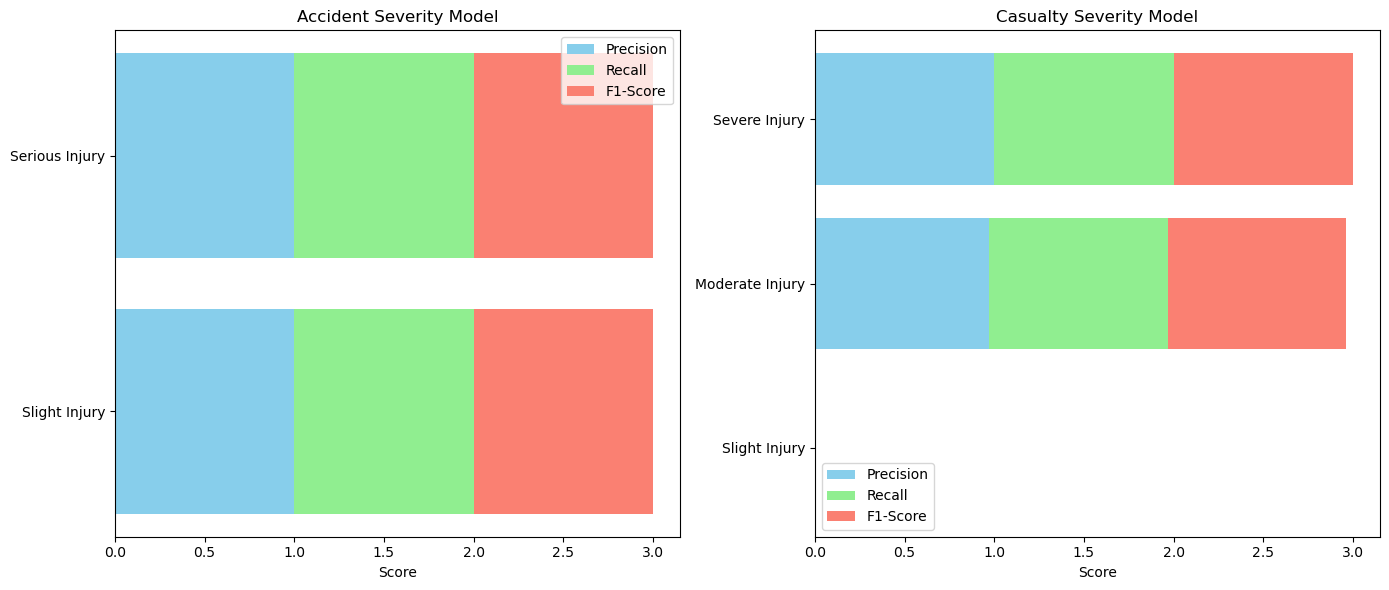

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Accident Severity Model (first report)
acc_report = {
    "Class": ["Slight Injury", "Serious Injury"],
    "Precision": [1.00, 1.00],
    "Recall": [1.00, 1.00],
    "F1-Score": [1.00, 1.00],
    "Support": [3143, 552]
}

# Data for Casualty Severity Model (second report)
cas_report = {
    "Class": ["Slight Injury", "Moderate Injury", "Severe Injury"],
    "Precision": [0.00, 0.97, 1.00],
    "Recall": [0.00, 1.00, 1.00],
    "F1-Score": [0.00, 0.99, 1.00],
    "Support": [6, 229, 2127]
}


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Accident Severity Model
axes[0].barh(acc_report["Class"], acc_report["Precision"], color='skyblue', label='Precision')
axes[0].barh(acc_report["Class"], acc_report["Recall"], left=acc_report["Precision"], color='lightgreen', label='Recall')
axes[0].barh(acc_report["Class"], acc_report["F1-Score"], left=np.add(acc_report["Precision"], acc_report["Recall"]), color='salmon', label='F1-Score')
axes[0].set_title('Accident Severity Model')
axes[0].set_xlabel('Score')
axes[0].legend()

# Plot for Casualty Severity Model
axes[1].barh(cas_report["Class"], cas_report["Precision"], color='skyblue', label='Precision')
axes[1].barh(cas_report["Class"], cas_report["Recall"], left=cas_report["Precision"], color='lightgreen', label='Recall')
axes[1].barh(cas_report["Class"], cas_report["F1-Score"], left=np.add(cas_report["Precision"], cas_report["Recall"]), color='salmon', label='F1-Score')
axes[1].set_title('Casualty Severity Model')
axes[1].set_xlabel('Score')
axes[1].legend()

plt.tight_layout()
plt.show()


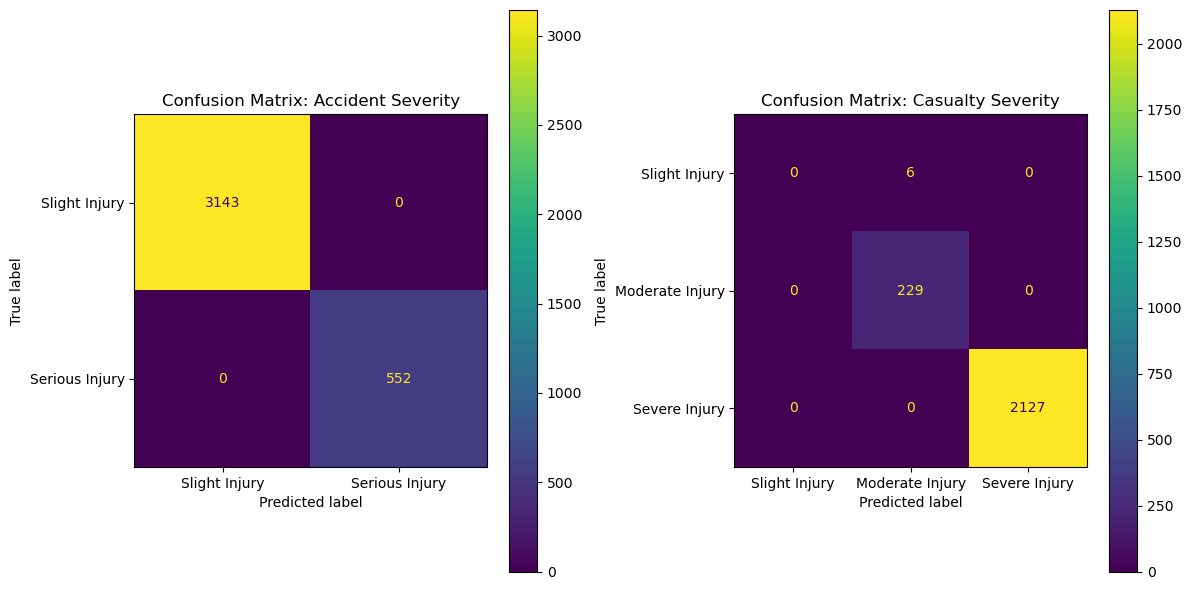

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion matrices for both models
conf_matrix_acc = confusion_matrix(y_test_acc, y_pred_acc)
conf_matrix_cas = confusion_matrix(y_test_cas, y_pred_cas)

# Create confusion matrix visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Accident Severity Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_acc, display_labels=["Slight Injury", "Serious Injury"]).plot(ax=axes[0])
axes[0].set_title('Confusion Matrix: Accident Severity')

# Casualty Severity Confusion Matrix
ConfusionMatrixDisplay(conf_matrix_cas, display_labels=["Slight Injury", "Moderate Injury", "Severe Injury"]).plot(ax=axes[1])
axes[1].set_title('Confusion Matrix: Casualty Severity')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the target variable again (Number_of_casualties)
y = df['Number_of_casualties']

# Apply one-hot encoding to all categorical variables
X = df.drop(columns=['Number_of_casualties', 'Time'])
X_encoded = pd.get_dummies(X, drop_first=True)

# Impute missing values using the median strategy
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(0.9029952368064953, 0.17561831599173672)

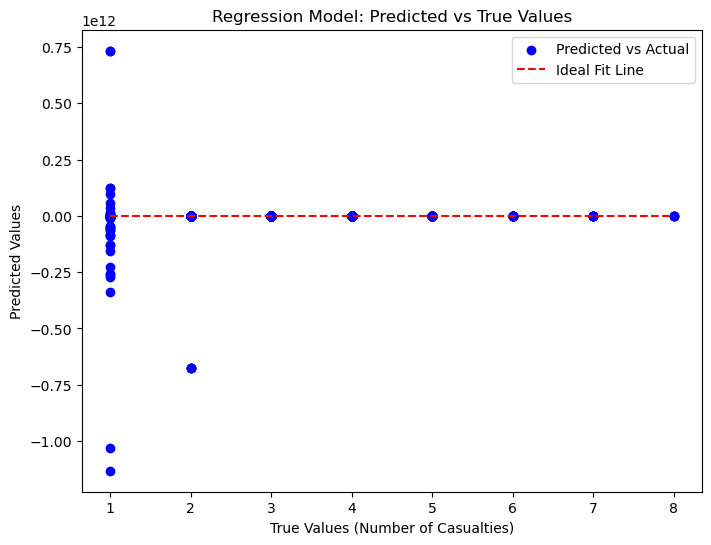

Mean Squared Error: 1.5603122175615385e+21
R-Squared: -1.4244735310466442e+21


In [17]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression  # Or use RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the target variable (Number_of_casualties)
y = df_encoded['Number_of_casualties']

# Apply one-hot encoding to all categorical variables
X = df_encoded.drop(columns=['Number_of_casualties'])  # Drop the target column only
X_encoded = pd.get_dummies(X, drop_first=True)

# Impute missing values using the median strategy
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and train the regression model (Linear Regression in this case)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Plot the regression model (scatter plot of predictions vs true values)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel('True Values (Number of Casualties)')
plt.ylabel('Predicted Values')
plt.title('Regression Model: Predicted vs True Values')
plt.legend()
plt.show()

# Evaluate the model (optional)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


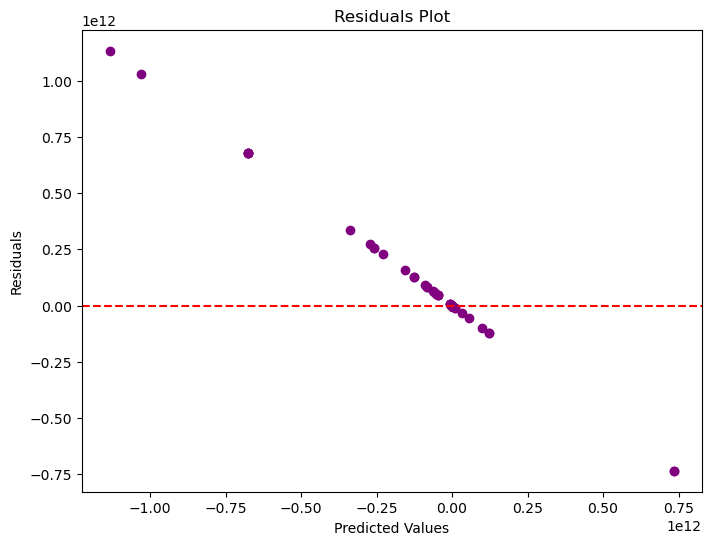

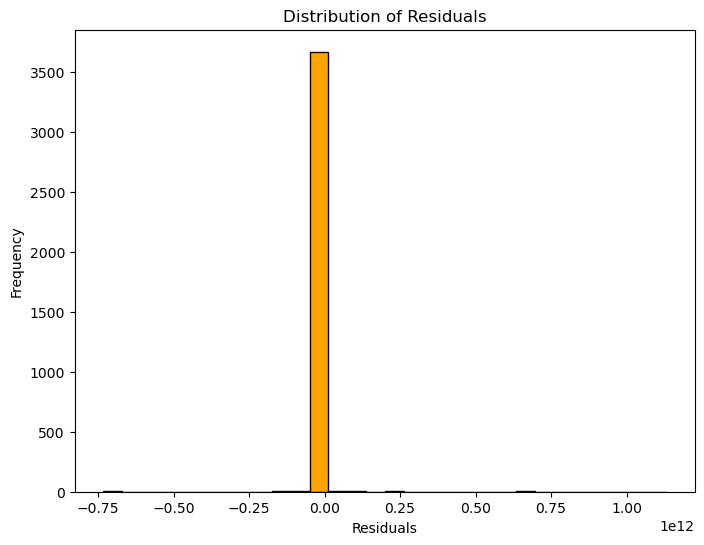

In [18]:
# Residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plotting the distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


C:\Users\coetz\AppData\Local\Temp\ipykernel_7596\60492099.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


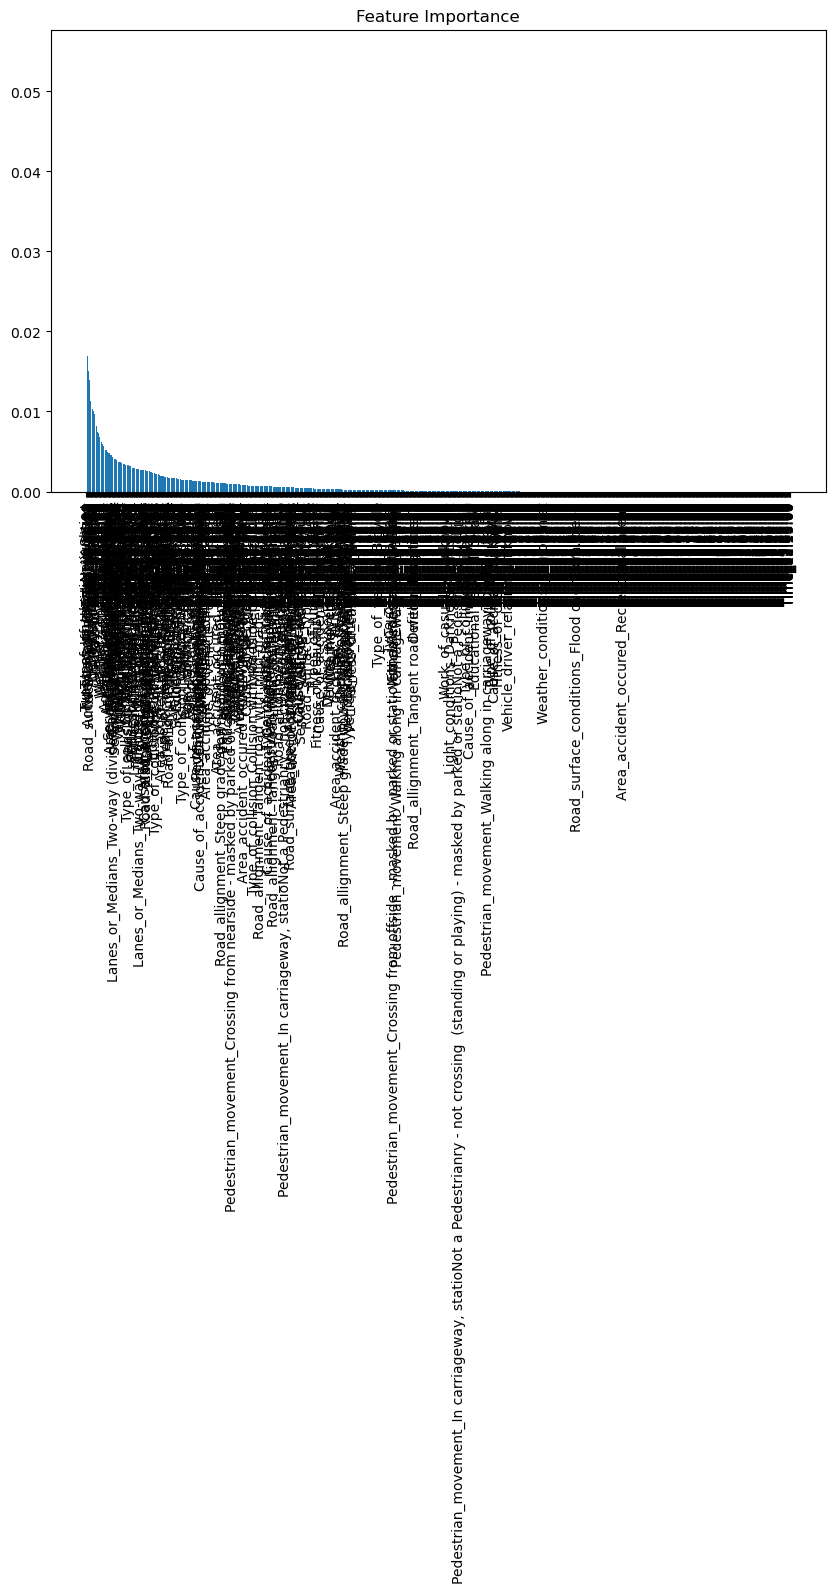

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importances from the Random Forest model
importances = rf_regressor.feature_importances_
feature_names = X_encoded.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X_encoded.shape[1]), importances[indices], align='center')
plt.xticks(range(X_encoded.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best R² score:", best_score)

MODEL BUILDING AND EVALUATION

VISUALIZATIONS

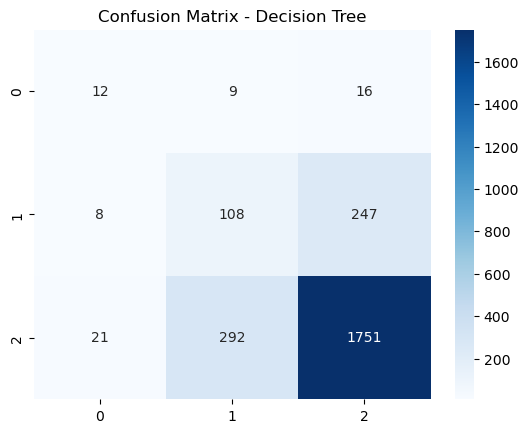

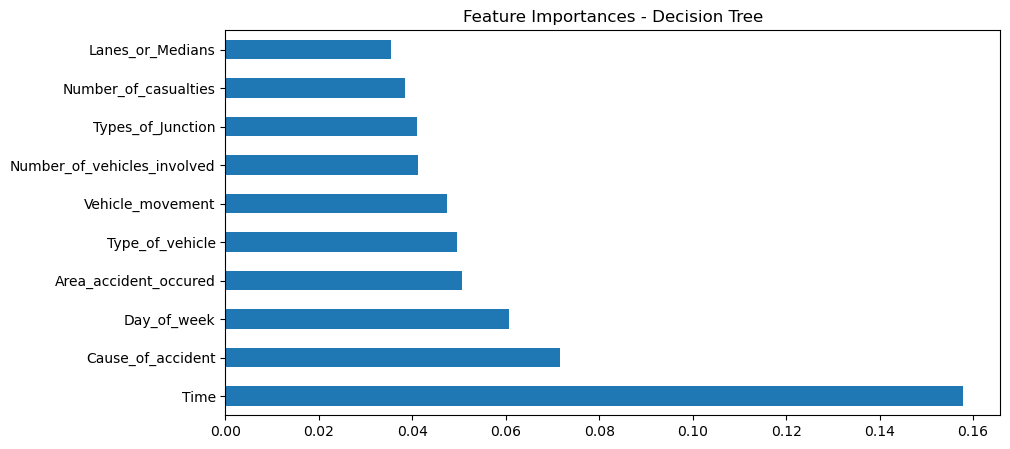

In [26]:
# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_model.predict(X_test))
sns.heatmap(dt_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Feature Importance for Decision Tree
plt.figure(figsize=(10, 5))
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances - Decision Tree')
plt.show()


XAI TECHNIQUES - LIME AND SHAP

LIME

In [27]:
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, feature_names=X.columns, class_names=['Slight', 'Serious'], mode='classification'
)

# Explain a sample prediction with LIME (Decision Tree)
i = 5  # Example index from test set
exp = explainer.explain_instance(X_test[i], dt_model.predict_proba)
exp.show_in_notebook()


SHAP

c:\Users\fabio\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
c:\Users\fabio\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


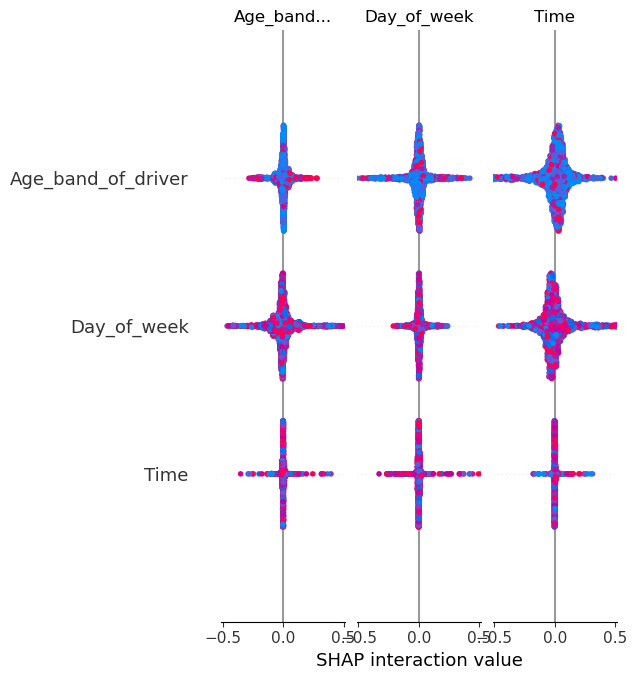

In [28]:
# Initialize SHAP TreeExplainer
shap_explainer = shap.TreeExplainer(dt_model)
shap_values = shap_explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
